In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ls

 Volume in drive C is OS
 Volume Serial Number is 2E77-A41D

 Directory of c:\Users\cyril\Documents\MSc Physics and Astronomy\Thesis\GitHub\Free_energy_of_simplicial_complexes\Cyril

08/03/2024  10:48    <DIR>          .
08/03/2024  10:54    <DIR>          ..
08/03/2024  10:48    <DIR>          .ipynb_checkpoints
08/03/2024  10:48         2.726.043 100206_rfMRI_REST1_Atlas_MSMAll_hp2000_clean_Schaefer2018_100Parcels_7Networks_Tian_Subcortex_S1_3T.txt
08/03/2024  10:48             6.326 Create PR data.ipynb
08/03/2024  10:48             1.340 Creating Corr Matrixes.ipynb
08/03/2024  10:48           113.187 Cyril_real_vs_random.ipynb
08/03/2024  10:48         5.635.498 PR_100206_rfMRI_REST1_Atlas_MSMAll_hp2000_clean_Schaefer2018_100Parcels_7Networks_Tian_Subcortex_S1_3T.txt
08/03/2024  10:48    <DIR>          PR_CorreMatrixes
08/03/2024  10:46    <DIR>          PR_HCP
08/03/2024  10:48           337.984 prunned_matrix.txt100206_rfMRI_REST1_Atlas_MSMAll_hp2000_clean_Schaefer2018_100Parcel

In [31]:
real=pd.read_csv('100206_rfMRI_REST1_Atlas_MSMAll_hp2000_clean_Schaefer2018_100Parcels_7Networks_Tian_Subcortex_S1_3T.txt',sep ='\t',header=None)

In [32]:
real_corr=real.T.corr().to_numpy()
print(np.shape(real_corr))

(116, 116)


In [33]:
random=pd.read_csv('PR_100206_rfMRI_REST1_Atlas_MSMAll_hp2000_clean_Schaefer2018_100Parcels_7Networks_Tian_Subcortex_S1_3T.txt',sep ='\t',header=None)

In [34]:
random_corr=random.T.corr().to_numpy()
print(np.shape(random_corr))

(115, 115)


13456
13225


Text(0, 0.5, 'Frequency')

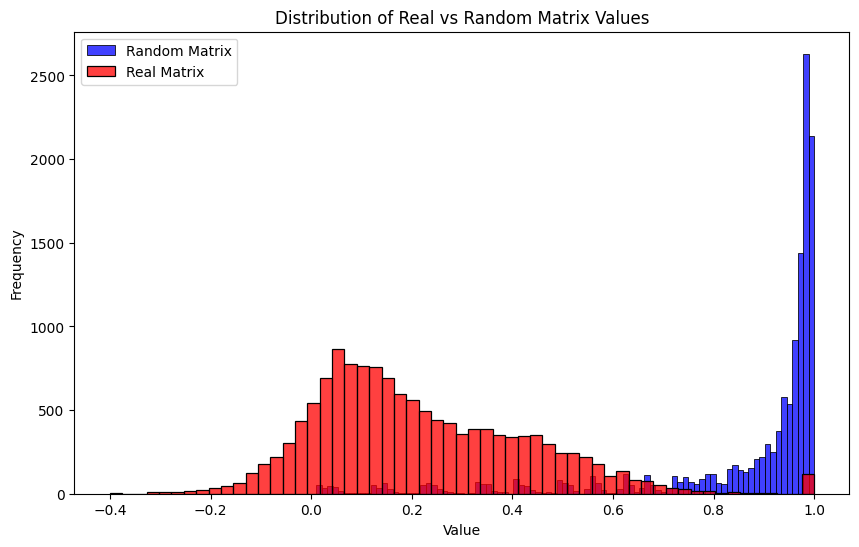

In [35]:
# Assuming real_corr and random_corr are your matrices
# Flatten the matrices
real_corr_flat = real_corr.flatten()
random_corr_flat = random_corr.flatten()

print(len(real_corr_flat))
print(len(random_corr_flat))

# Initialize a plot
plt.figure(figsize=(10, 6))

# Plot each with labels
#sns.histplot([real_corr_flat,random_corr_flat], color=['blue','red'], label=['Real Matrix','Random Matrix'])
sns.histplot(random_corr_flat, color='blue', label='Random Matrix')
sns.histplot(real_corr_flat, color='red', label='Real Matrix')
#sns.histplot(, color='red', label='Random Matrix')

# Add legend to the plot to show the labels
plt.legend()

# Optional: Add titles and labels
plt.title('Distribution of Real vs Random Matrix Values')
plt.xlabel('Value')
plt.ylabel('Frequency')

In [21]:
import numpy as np

# Example matrices
random_matrix = random_corr  # Random matrix
real_matrix = real_corr  # Real matrix, replace with your actual real matrix

# Compute the 2.5th and 97.5th percentiles of the random matrix
q025 = np.quantile(random_matrix, 0.025)
q975 = np.quantile(random_matrix, 0.975)

# Create a mask for elements in the real matrix that are NOT between q025 and q975
mask = (real_matrix < q025) | (real_matrix > q975)

# Apply mask to the real matrix
# Option 1: Set elements within the quantiles to 0 (or choose another value)
pruned_matrix = np.where(mask, real_matrix, 0)

# Option 2: If you want to completely remove these elements, it's a bit more complex
# as it would change the shape of the matrix. Typically, you'd work with the masked array
# or adapt your data structure for analyses that ignore these values.

# Show some of the pruned matrix values
print(pruned_matrix)  # Adjust as needed for your inspection


[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.07413469 ... 0.06210749 0.05147955 0.01105839]
 [0.         0.07413469 1.         ... 0.14015591 0.1416177  0.13303256]
 ...
 [0.         0.06210749 0.14015591 ... 1.         0.         0.        ]
 [0.         0.05147955 0.1416177  ... 0.         1.         0.        ]
 [0.         0.01105839 0.13303256 ... 0.         0.         1.        ]]


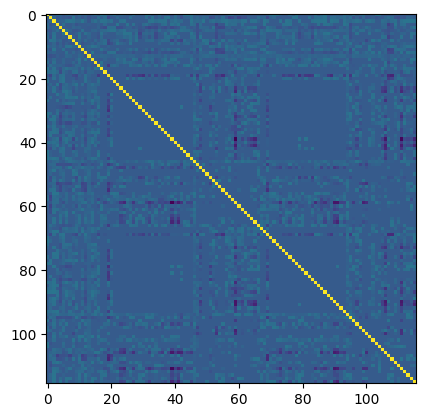

In [22]:
plt.imshow(pruned_matrix)

In [59]:
np.savetxt('prunned_matrix.txt'+real_name,pruned_matrix)